In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Weather dataset.csv')
data.head()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [4]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sno     117 non-null    int64  
 1   YEAR    117 non-null    int64  
 2   JAN     117 non-null    float64
 3   FEB     117 non-null    float64
 4   MAR     117 non-null    float64
 5   APR     117 non-null    float64
 6   MAY     117 non-null    float64
 7   JUN     117 non-null    float64
 8   JUL     117 non-null    float64
 9   AUG     117 non-null    float64
 10  SEP     117 non-null    float64
 11  OCT     117 non-null    float64
 12  NOV     117 non-null    float64
 13  DEC     117 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [6]:
data.describe()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [7]:
# transpose the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,117.0,58.000000,33.919021,0.00,29.00,58.00,87.00,116.00
YEAR,117.0,1959.000000,33.919021,1901.00,1930.00,1959.00,1988.00,2017.00
JAN,117.0,18.423248,0.612963,17.25,18.07,18.35,18.72,20.92
FEB,117.0,20.137949,0.900944,17.79,19.47,19.99,20.55,23.58
MAR,117.0,23.434188,0.862825,21.78,22.84,23.33,23.93,26.61
APR,117.0,26.514103,0.750740,24.84,26.00,26.54,26.91,29.56
MAY,117.0,28.386410,0.644678,26.97,27.95,28.34,28.82,30.78
JUN,117.0,28.300940,0.460603,27.33,28.02,28.25,28.58,29.88
JUL,117.0,27.369231,0.345920,26.48,27.15,27.34,27.53,28.47
AUG,117.0,26.940085,0.348876,26.21,26.73,26.90,27.15,28.17


In [8]:
data.head()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


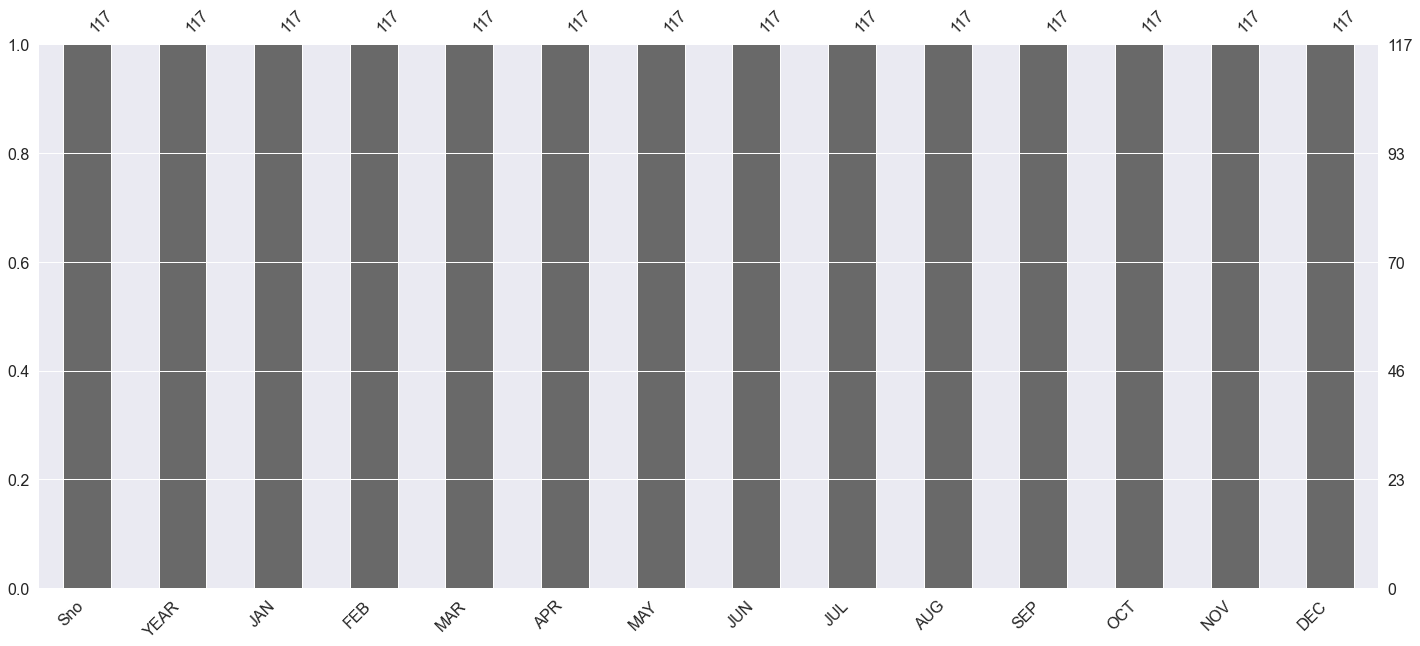

In [11]:
# null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(data)

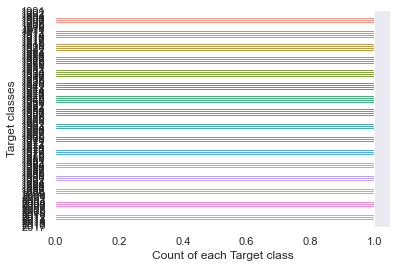

In [14]:
sns.countplot(y=data.YEAR,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

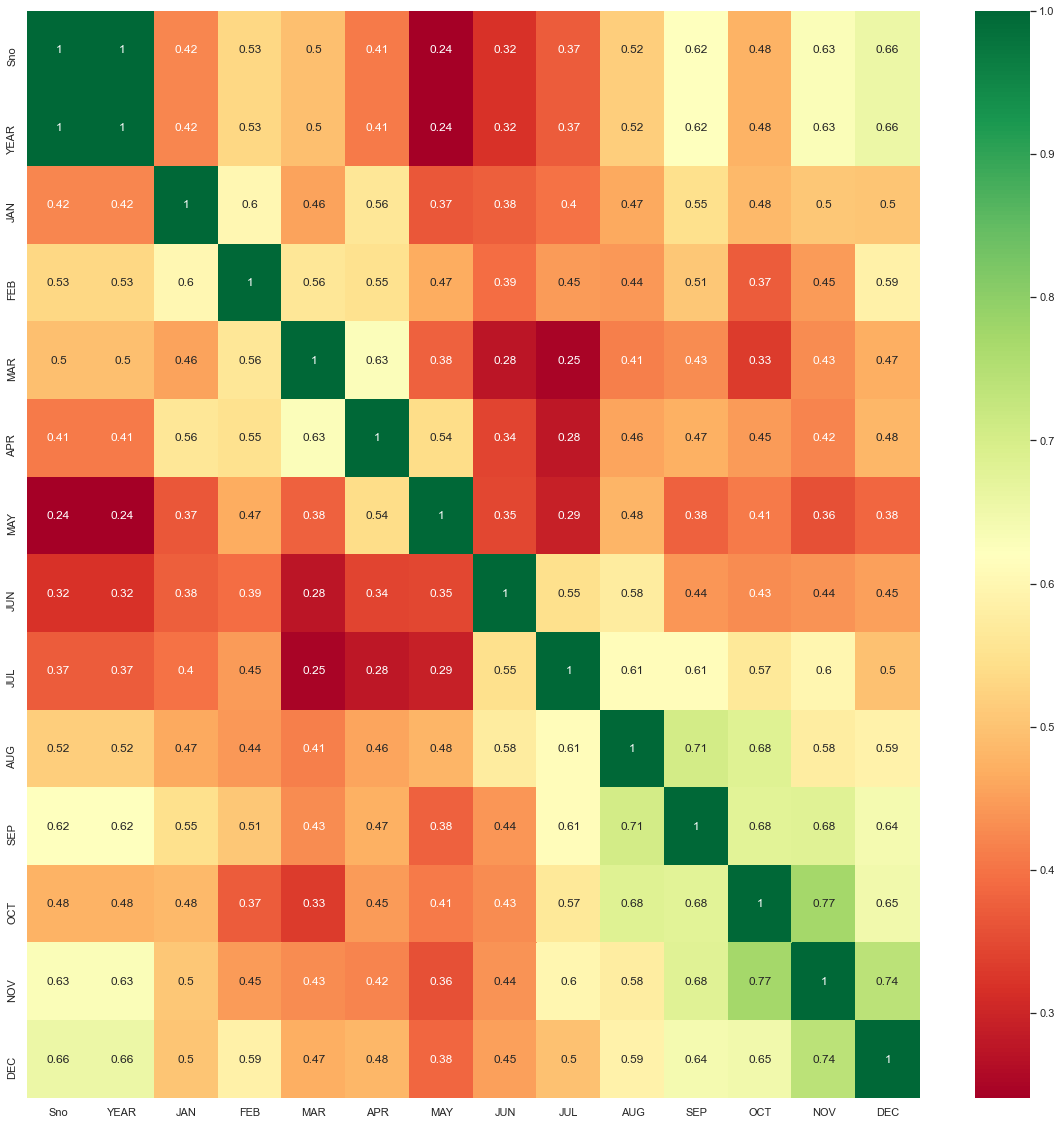

In [18]:
plt.figure(figsize=(20,20))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')

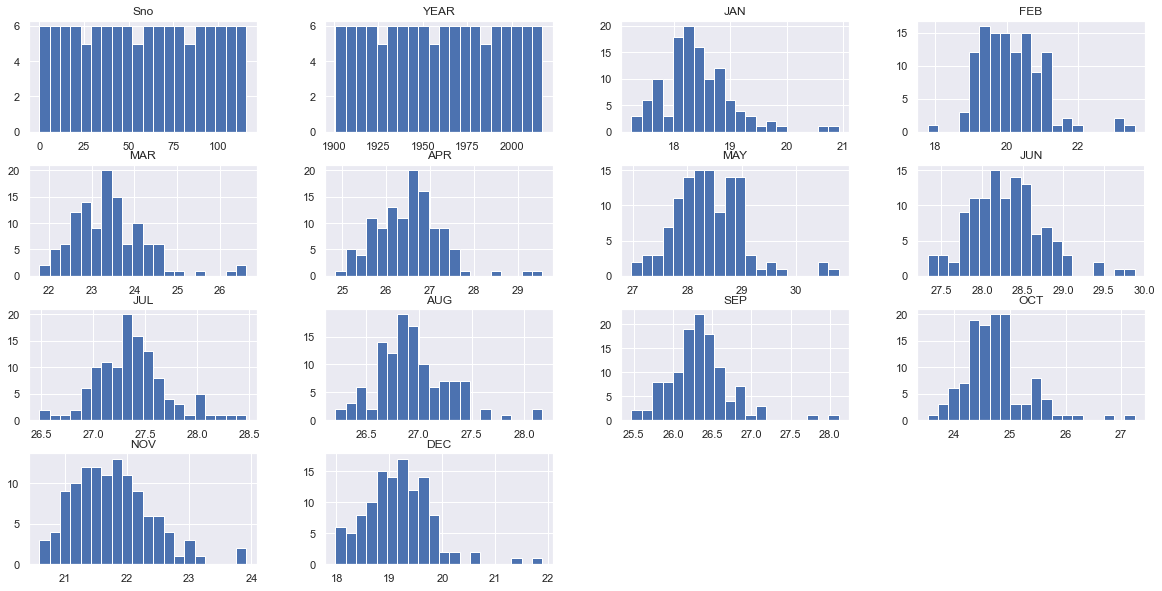

In [21]:
data.hist(figsize=(20,10),bins = 20)
plt.title("Temprature")
plt.show()

In [22]:
X = data.drop(['YEAR'],axis=1)
y = data.YEAR

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [28]:
# With PCA
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [29]:
pca.get_covariance()

array([[0.08550089, 0.02071177, 0.02420131, 0.02587699, 0.01898088,
        0.01189392, 0.01691031, 0.01898688, 0.02689643, 0.02669953,
        0.02110962, 0.03517504, 0.03121873],
       [0.02071177, 0.02789566, 0.01563235, 0.01360628, 0.01495987,
        0.01033485, 0.01132636, 0.01158781, 0.01383439, 0.01340447,
        0.01224379, 0.01605803, 0.01364082],
       [0.02420131, 0.01563235, 0.02421246, 0.01564561, 0.01361731,
        0.01231507, 0.01102448, 0.01205114, 0.01229873, 0.01154717,
        0.00875661, 0.01323401, 0.01482149],
       [0.02587699, 0.01360628, 0.01564561, 0.03191182, 0.01783536,
        0.01142823, 0.00889152, 0.0077148 , 0.01319207, 0.0112652 ,
        0.0089717 , 0.01456479, 0.01368409],
       [0.01898088, 0.01495987, 0.01361731, 0.01783536, 0.02529852,
        0.01459812, 0.00984679, 0.00766312, 0.01302213, 0.01109301,
        0.01076188, 0.01275067, 0.01245458],
       [0.01189392, 0.01033485, 0.01231507, 0.01142823, 0.01459812,
        0.02863093, 0.01056

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.53683748, 0.10706122, 0.08729024, 0.04907246, 0.04359601,
       0.03551714, 0.03180492, 0.03096074, 0.02136505, 0.01954596,
       0.01385456, 0.01322282, 0.00987138])